# Lesson 7 - Parkinson PCR

## Author - Studentname

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [1]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [3]:
parkinsons_df = pd.read_csv(filename)
print(parkinsons_df.head())
parkinsons_df.dtypes

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [4]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [5]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
#parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))
# Get target and original x-matrix
y_dependent = parkinsons_df[target_label]
x_features = parkinsons_df.as_matrix(columns=feature_labels)


DataFrame one-hot-expanded shape: (5875, 22)


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_features_scaled = np.apply_along_axis(scale, 1, x_features)

# Create a scaled y-target.
y_dependent_scaled = scale(y_dependent)


In [8]:
# PCR!!
pca = PCA(n_components = 16)
pca_result = pca.fit_transform(x_features_scaled)

# Establish column names
column_names = ['pc' + str(ix+1) for ix in range(x_features_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns = column_names)
pca_df[target_label] = y_dependent_scaled
print(pca_df.head())
print(pca_df.shape)

        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.045088  0.021846 -0.011965  0.002224 -0.003324 -0.000952 -0.001371   
1 -0.064457  0.036847 -0.017445 -0.003462 -0.006028 -0.001887  0.000433   
2 -0.052680  0.020125 -0.004610  0.001911 -0.014712 -0.000134 -0.000101   
3 -0.033055  0.017032 -0.013254  0.013447 -0.025724  0.002620 -0.001050   
4 -0.060086  0.027857 -0.010304  0.000267 -0.014814  0.000494  0.000529   

        pc8       pc9      pc10      pc11      pc12      pc13          pc14  \
0  0.000894  0.000743 -0.000064  0.000037 -0.000069 -0.000018 -9.254165e-08   
1  0.000536  0.000411  0.000058  0.000113  0.000058  0.000017 -8.425380e-08   
2  0.000922 -0.000104  0.000088 -0.000167 -0.000078  0.000031  1.518409e-07   
3  0.001790 -0.001052 -0.000038 -0.001359 -0.000215 -0.000030  1.039336e-06   
4  0.000657 -0.000013  0.000212 -0.000077 -0.000039  0.000048  2.201413e-07   

           pc15          pc16  total_UPDRS  
0 -4.101552e-07  1.480556e-15

[3.47834662e-02 1.20302807e-03 6.70121366e-04 2.72446869e-04
 1.97675170e-04 8.11822128e-05 1.68296588e-05 1.51410636e-05
 4.70752702e-06 1.80571521e-06 7.76025353e-07 1.71546249e-07
 5.86072793e-08 1.51846603e-11 3.30694608e-13 5.04738438e-30]


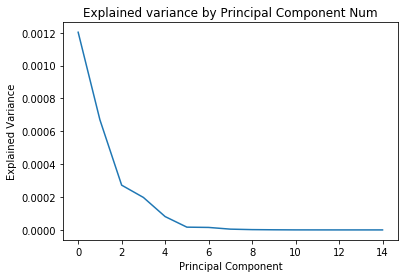

In [9]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).

plt.plot(pca.explained_variance_[1:])
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

print(pca.explained_variance_)


                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     42.50
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           3.73e-43
Time:                        07:32:23   Log-Likelihood:                -8231.8
No. Observations:                5875   AIC:                         1.648e+04
Df Residuals:                    5869   BIC:                         1.652e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.013  -3.42e-13      1.0

Text(0.5, 1.0, 'Residual Histogram')

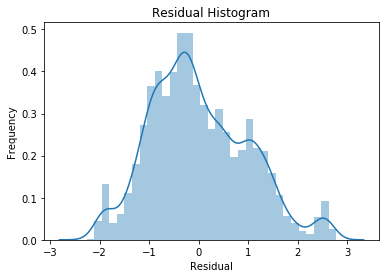

In [10]:
# Perform linear regression with the first N columns.
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

## Summary

We began this analysis with 22 features - wow! We got rid of the one-hot encoded categorical variables for our PCA, as we wanted to scale those as features separately. We began with 16 and ended up with 5. When looking at the graph for the explained variances, we can see that around component 5 is when the variances are significantly less explained by the components. This makes sense, as the first few will likley have the majority of explained variances as the functions are created. Here, we can see that pc3 is not needed for a significant fit. We can also see this pattern in the explained variance for each component, where the components are overall explaining less and less variance as they get closer to the end of the list. For our adjusted r-squared we see that 3.4% of the dependent variable (total_UPDRS) is explained by our principal components. This means that overall, the data that was collected related to parkinsons patients does not help much in predicting total_UPDRS.